In [ ]:
# This generates a spectrum of an exozodi 
# (worry about making it resolved later)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody
from astropy import units as u
from scipy.integrate import quad

In [ ]:
# surface brightness profile is
# Ref.: Kennedy 2015 ApJSS 216:23, Eqn. 1
#
# S_disk = Sigma_m * BB(lambda, T(r))
#
# where 
# 
# Sigma_m = z * Sigma_m_0 * (r/r0)^(-alpha), where z is number of zodis and Sigma_m_0 normalizes the surface brightness
# T(r) = 278.3K * Ls^(0.25) * r^-(0.5)

In [ ]:
def T_temp(Ls, radius):
    # Ls: luminosity of star (units L_sol)
    # r: radius in disk (units AU)

    T = 278.3*u.K * (Ls**0.25) * (radius**-0.5)

    return T

In [ ]:
def Sigma_m(r, r0, alpha, z, Sigma_m_0):
    # r: radius in disk (units AU)
    # r0: reference radius (units AU)
    # alpha: power law index
    # z: number of zodis
    # Sigma_m_0: normalization factor
    #   Kennedy: 'is to be set at some r0 (in AU) such that the surface density is in units of zodis z (see Section 2.2.3).'

    Sigma_m = z * Sigma_m_0 * (r/r0)**(-alpha)

    return Sigma_m

In [ ]:
# surface brightness profile S(lambda, r)
def S_disk_lambda_r(r, r0, alpha, z, Sigma_m_0, Ls, radius):

    return Sigma_m(r, r0, alpha, z, Sigma_m_0) * BlackBody(temperature=T_temp(Ls, radius),  scale=1.0*u.W/(u.m**2*u.micron*u.sr))

In [ ]:
# surface brightness as function of wavelength S(lambda): S_disk_lambda_r integrated over dA = r dr dtheta
def S_disk_lambda(r, r0, alpha, z, Sigma_m_0, T_temp, wavel_array):
    
    # Integrate over r * S_disk_lambda_r() dr from r[0] to r[-1]
    S_lambda = []
    for lam in np.atleast_1d(wavel_array):
        S_r = np.array(
                        [Sigma_m(r, r0, alpha, z, Sigma_m_0) * BlackBody(temperature=T_temp(Ls=1, radius=r),  
                        scale=1.0*u.W/(u.m**2*u.micron*u.sr))(lam) for r in r]
                        )
        integrand = r * S_r
        S_lam, error = 2 * np.pi * quad(integrand, r)
        S_lambda.append(S_lam)

    return np.array(S_lambda)

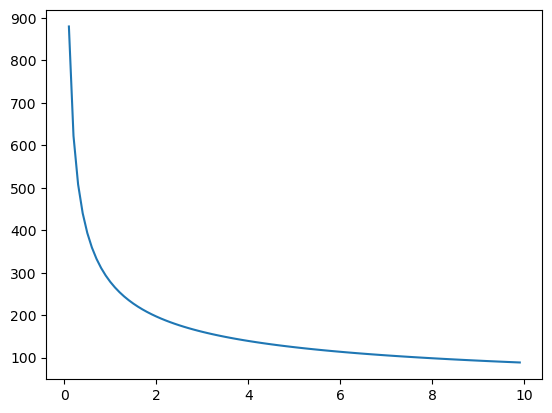

In [5]:
Ls = 1
r = np.arange(0.1, 10, 0.1)
T_temp(Ls=Ls, radius=r)
plt.plot(r, T_temp(Ls=Ls, radius=r))
plt.show()

In [ ]:
bb_planet_lambda = BlackBody(temperature=temp_bb_planet*u.K,  scale=1.0*u.W/(u.m**2*u.micron*u.sr))